COGS: Cost of Goods Sold

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#revenue mean
revenue_mean = 170

#revenue estandard
revenue_std = 20

#Simulations (Normal distribution)
iterations = 1000 


In [ ]:
#Set of values with normal distribution
rev = np.random.normal(revenue_mean, revenue_std, iterations)
#rev

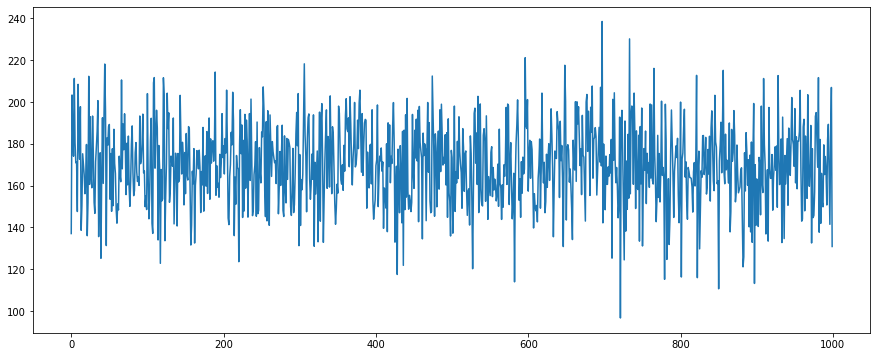

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()


Assumption: Traditionally COGS represents 60 ± 10% of Gross profit.

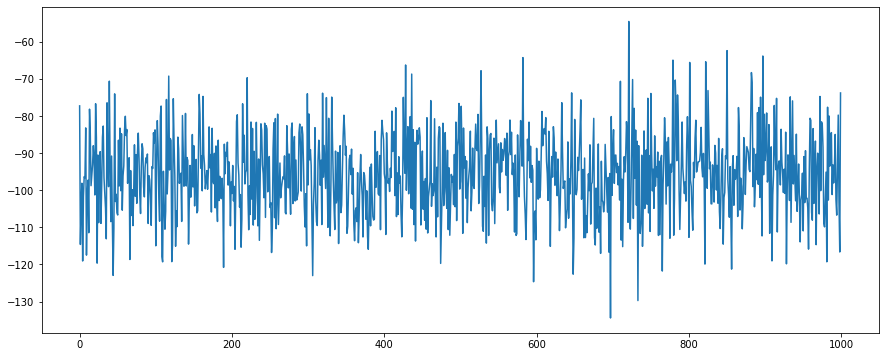

In [ ]:
COGS = - (rev* np.random.normal(0.6,0.1)) #cost -> minus
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [ ]:
print(f'The mean of COGS is {round(COGS.mean(),2)}')
print(f'The standard deviation of COGS is {round(COGS.std(),2)}')

The mean of COGS is -95.74
The standard deviation of COGS is 11.04


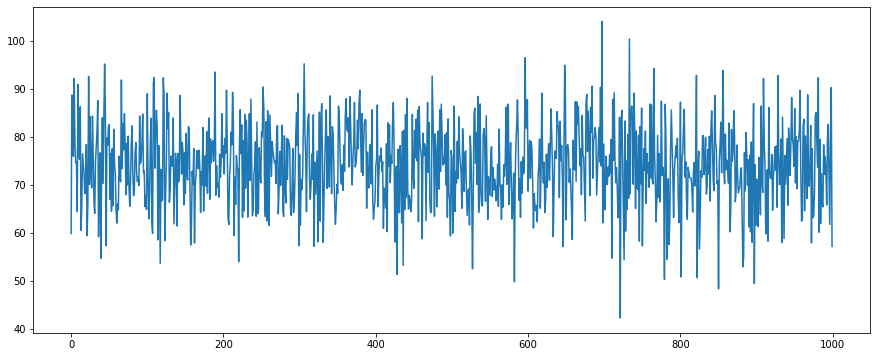

In [ ]:
Gross_Profit = rev + COGS

plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [ ]:
print(f'Maximum of Gross Profit: {round(max(Gross_Profit),2)}')
print(f'Minimum of Gross Profit: {round(min(Gross_Profit),2)}')
print(f'Mean of Gross Profit: {round(Gross_Profit.mean(),2)}')
print(f'Standard Deviation of Gross Profit: {round(Gross_Profit.std(),2)}')

Maximum of Gross Profit: 104.06
Minimum of Gross Profit: 42.21
Mean of Gross Profit: 74.11
Standard Deviation of Gross Profit: 8.54


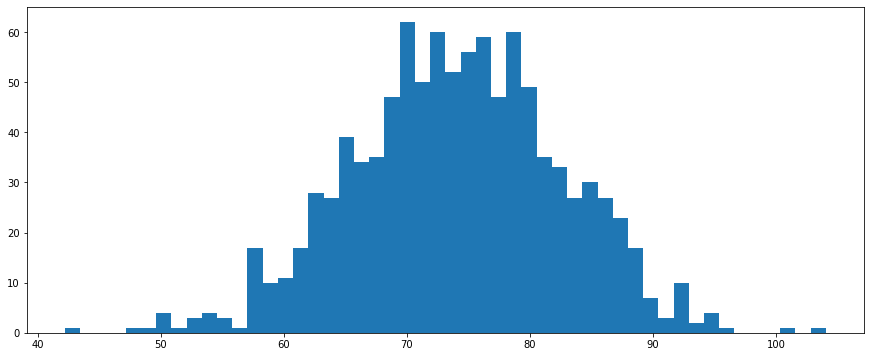

In [ ]:
#Plot histogram to check normal distribution
plt.figure(figsize=(15,6))
plt.hist(Gross_Profit, bins = 50)
plt.show()

#Forecasting Stock Prices

Brownian Motion:
1. **Drift:** Expected daily return of the stock -> Drift = mean -1/2 *std^2
2. **Volatility:** Random varaible -> Volatility = std * Z(Rand(0;1))

Price Today = Price Yesterday*exp(Drift+Volatility)

In [ ]:
#Load PG asset data
data = pd.read_csv('PG_2007_2017.csv',parse_dates = ['Date'] ,dtype = {'PG': float})
data['Date']= pd.to_datetime(data['Date'])
data = data.set_index('Date')

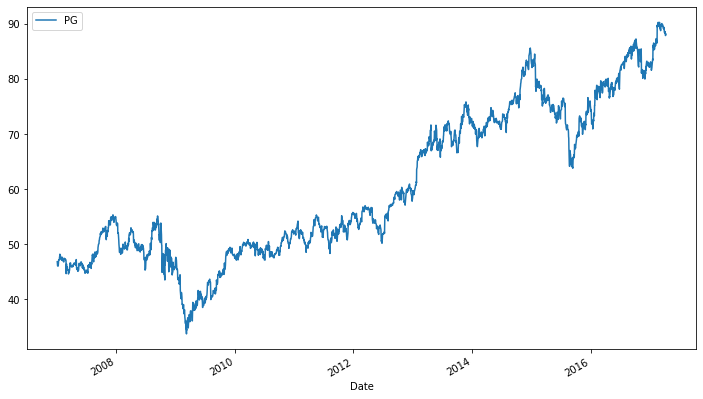

In [ ]:
data.plot(figsize=(12,7))

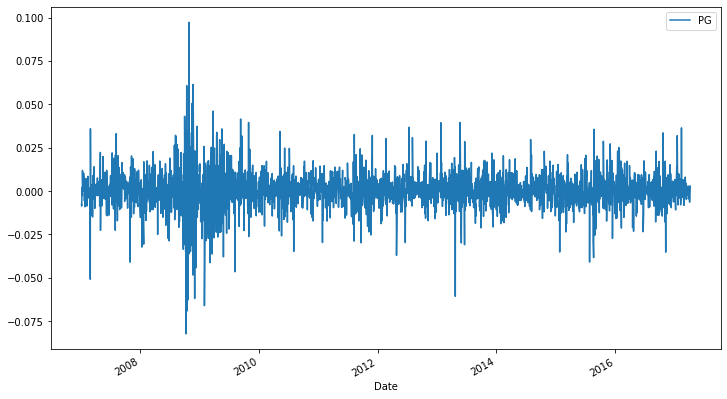

In [ ]:
#pct_change: Percentage change return

data['PG'] = np.log(1+data.pct_change())
data.plot(figsize=(12,7))


The return shows a normal distribution.

In [ ]:
mean_returns = data['PG'].mean()
print(f'The mean of returns is {mean_returns}')

var_returns = data['PG'].var()
print(f'The variance of returns is {var_returns}')



The mean of returns is 0.000244389579789833
The variance of returns is 0.00012405717157319124


##Drift:
drift = mean - 0.5*var

In [ ]:
drift = mean_returns-0.5*var_returns
print(f'The Drift of returns is {drift}')

stdev = data['PG'].std()
print(f'The standard desviation (volatility) of returns is {stdev}')

The Drift of returns is 0.00018236099400323737
The standard desviation (volatility) of returns is 0.011138095509250727


##Brownian Motion:

r = Drift + stdev* exp(r)

Z corresponds to the distance between the mean and the events, expressed as the number of stanrdard deviation

In [ ]:
norm.ppf(0.95)

1.6448536269514722

If an event has 95% probability of ocurring. The distance between thie event and the mean will be approximatly 1.65 standard deviations according to normal distribution. 

In [ ]:
x = np.random.rand(10,2)
x

array([[0.00805378, 0.51459042],
       [0.20688219, 0.20127326],
       [0.92211629, 0.48395656],
       [0.03328754, 0.03692061],
       [0.22270478, 0.56584182],
       [0.29262713, 0.28327931],
       [0.47270254, 0.61405831],
       [0.59066053, 0.60580084],
       [0.94781883, 0.20819659],
       [0.20655822, 0.13838352]])

In [ ]:
Z=norm.ppf(x)
Z

array([[-2.40646915,  0.03658091],
       [-0.8172871 , -0.83708193],
       [ 1.41945153, -0.04022579],
       [-1.83453193, -1.78759592],
       [-0.76309027,  0.16579745],
       [-0.54572605, -0.57312714],
       [-0.06847808,  0.28991224],
       [ 0.22924444,  0.26839105],
       [ 1.62406312, -0.81269461],
       [-0.8184217 , -1.0876106 ]])

In [ ]:
#1000 days forecasting
t_intervals = 1000 

#ten series of future stock productions
iterations = 10

daily_returns = exp(r)

r = drift + stdev.Z

In [ ]:
daily_returns = np.exp(drift + stdev *norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01216065, 0.99921085, 0.99449669, ..., 1.01033882, 0.99308176,
        1.01551599],
       [0.9994488 , 1.00066628, 0.99776899, ..., 1.00825891, 0.9995248 ,
        0.99764744],
       [1.03762572, 0.98618104, 1.00698252, ..., 0.98104299, 0.99085718,
        0.98717682],
       ...,
       [0.99525832, 1.01094854, 1.02177169, ..., 0.97587464, 1.01090444,
        0.97279173],
       [0.98180536, 1.00112075, 1.00241872, ..., 1.01023636, 0.99630176,
        1.01098811],
       [0.99069636, 1.01206467, 1.00471441, ..., 1.00468181, 0.9929062 ,
        1.01246881]])

In [ ]:
#initial price of forecasting
df = pd.read_csv('PG_2007_2017.csv',parse_dates = ['Date'] ,dtype = {'PG': float})
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index('Date')
S0 = df.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10 00:00:00, dtype: float64

In [ ]:
price_list = np.zeros_like(daily_returns)

#same initial value for all simulations
price_list[0] = S0
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [ ]:
#Replace zeros by values in forecasting
for t in range(1,t_intervals):
  price_list[t] = price_list[t-1]* daily_returns[t]

In [ ]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.0700576 ,  88.17734082,  87.92203568, ...,  88.84639276,
         88.07675545,  87.91132451],
       [ 91.38375674,  86.95882156,  88.53595292, ...,  87.16213091,
         87.27148549,  86.7840215 ],
       ...,
       [107.33562687,  95.3873537 ,  87.56592245, ..., 117.94990646,
        114.87058599,  86.01519459],
       [105.3826942 ,  95.4942591 ,  87.77771964, ..., 119.1572838 ,
        114.44576722,  86.9603391 ],
       [104.40225161,  96.64636606,  88.19153976, ..., 119.71515613,
        113.63391144,  88.04463119]])

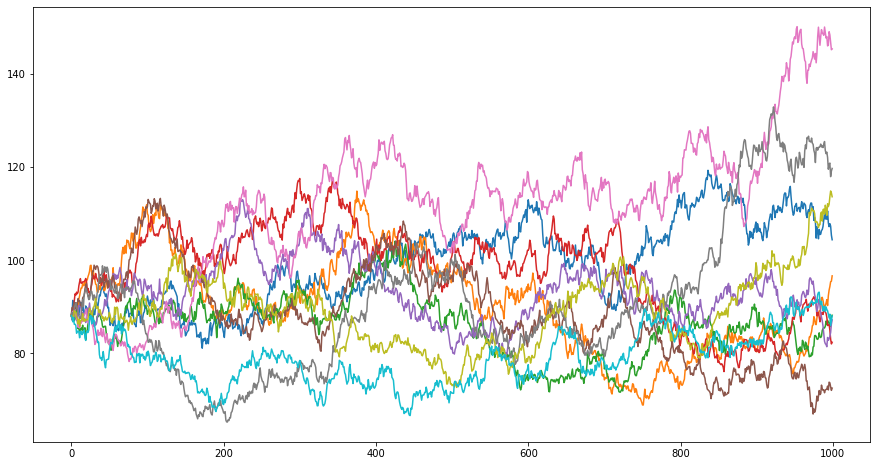

In [ ]:
#plot forecasting with Montecarlo simulation
plt.figure(figsize=(15,8))
plt.plot(price_list)